In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [4]:
print(digits.images[10])

[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]


In [5]:
print(digits.target[10])

0


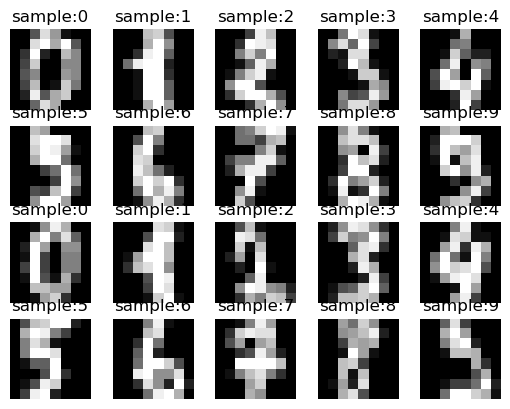

In [6]:
images_and_labels=list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(4,5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title("sample:%i" % label)

In [7]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [8]:
x=digits.data
y=digits.target
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

In [10]:
model=nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [11]:
X=torch.tensor(x, dtype=torch.float32)
Y=torch.tensor(y, dtype=torch.int64)

In [12]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())

In [13]:
loss_list=[]
for epoch in range(1000):
    optimizer.zero_grad()
    y_hat=model(X)
    loss=loss_fn(y_hat, Y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if epoch%100==0:
        print(epoch, loss.item())

0 2.320681571960449
100 0.18981479108333588
200 0.05876533314585686
300 0.025968922302126884
400 0.012836966663599014
500 0.007051577791571617
600 0.004342083353549242
700 0.002921966603025794
800 0.0020876543130725622
900 0.001553424634039402


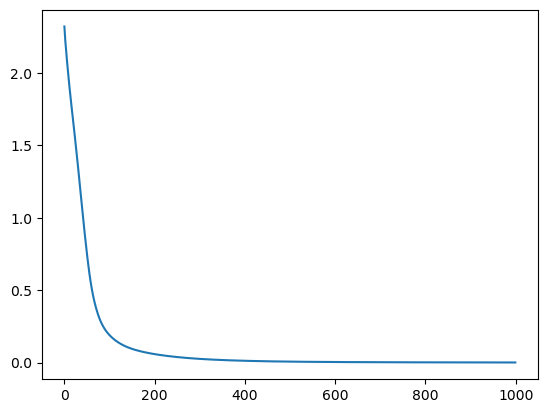

In [14]:
plt.plot(loss_list)

In [15]:
pred=model(X[[1]])
print(pred)
predicted=torch.argmax(pred)
print(predicted)
print(Y[1])

tensor([[-14.0901,  17.9968,  -3.8607,  -5.3966,   3.9121, -10.6863,  -0.1518,
          -3.9348,   3.5322, -10.8579]], grad_fn=<AddmmBackward0>)
tensor(1)
tensor(1)


In [16]:
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_openml

In [17]:
mnist=fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [18]:
fashion_mnist=fetch_openml(name='Fashion-MNIST')

In [19]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [20]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [21]:
print(mnist.target.shape)
print(mnist.data.shape)
print(mnist.target)

(70000,)
(70000, 784)
['5' '0' '4' ... '4' '5' '6']


In [22]:
mnist.target=mnist.target.astype(np.int8)
mnist.target

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [23]:
x=mnist.data/255
y=mnist.target

In [24]:
x[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
y[0]

5

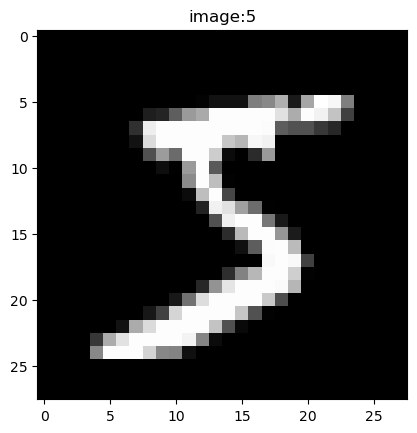

In [26]:
plt.imshow(x[0].reshape(28,28), cmap='gray')
plt.title('image:'+str(y[0]))
plt.show()

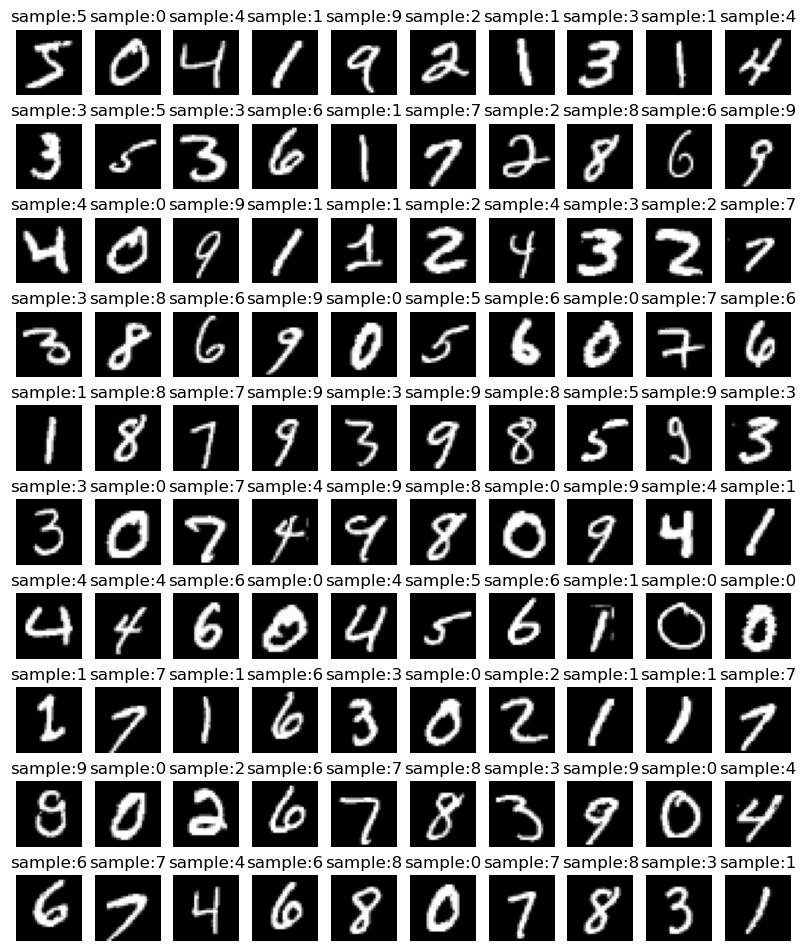

In [27]:
plt.figure(figsize=(10,12))

for i in range(100):
    plt.subplot(10,10, i+1)
    plt.axis('off')
    plt.imshow(x[i].reshape(28,28), cmap='gray')
    plt.title('sample:%i'%(y[i]))
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=1/7, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [29]:
X_train=torch.FloatTensor(x_train)
X_test=torch.FloatTensor(x_test)
Y_train=torch.LongTensor(y_train)
Y_test=torch.LongTensor(y_test)

In [30]:
ds_train=TensorDataset(X_train, Y_train)
ds_test=TensorDataset(X_test, Y_test)
load_train=DataLoader(ds_train, batch_size=64, shuffle=True)
load_test=DataLoader(ds_test, batch_size=64, shuffle=True)

In [31]:
model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2',nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3',nn.Linear(100, 100))
model.add_module('relu3', nn.ReLU())
model.add_module('fc4',nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)


In [32]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())
print(model.parameters())

<generator object Module.parameters at 0x000001F90C311E70>


In [33]:
costs=[]
accuracys=[]
epochs=[]

def train(epoch):
    model.train()
    cost=0
    accuracy=0

    for data, targets, in load_train:
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output, targets)
        
        _, y_hat=torch.max(output.data, 1)# 확률이 가장 높은 레이블이 무엇인지 계산
        accuracy+=y_hat.eq(targets.data.view_as(y_hat)).sum()
        cost+=loss.item()
        loss.backward()

        optimizer.step()

    epochs.append(epoch)
    costs.append(cost)
    accuracys.append(accuracy/60000)
    print(epoch, cost, accuracy/60000)

In [34]:
def test():
    model.eval()
    correct=0

    with torch.no_grad():
        for data, targets in load_test:
            output=model(data)
            _, predicted=torch.max(output, 1)
            correct+=predicted.eq(targets.data.view_as(predicted)).sum()

    data_num=len(load_test.dataset) #총데이터 건수
    print('테스트 데이터에서 예측 정확도:', data_num, 100*correct/data_num)

In [35]:
test()

테스트 데이터에서 예측 정확도: 10000 tensor(9.6400)


In [36]:
for epoch in range(20):
    train(epoch)
test()
    

0 332.6365419216454 tensor(0.8939)
1 128.8134290240705 tensor(0.9582)
2 90.14505042880774 tensor(0.9705)
3 67.57486116001382 tensor(0.9775)
4 53.17824534198735 tensor(0.9821)
5 43.73489425261505 tensor(0.9852)
6 35.49520093458705 tensor(0.9877)
7 32.058559486293234 tensor(0.9886)
8 26.471795584031497 tensor(0.9910)
9 23.314306927844882 tensor(0.9917)
10 20.36028174414787 tensor(0.9927)
11 20.487292531215644 tensor(0.9926)
12 13.851537136340994 tensor(0.9951)
13 15.234778214913604 tensor(0.9944)
14 13.78004352113021 tensor(0.9952)
15 14.951977106589766 tensor(0.9948)
16 12.175398629249685 tensor(0.9957)
17 13.172273889718781 tensor(0.9952)
18 10.804448427717034 tensor(0.9962)
19 11.579064571629488 tensor(0.9959)
테스트 데이터에서 예측 정확도: 10000 tensor(97.5500)


예측결과: tensor(1)
정답: tensor(1)


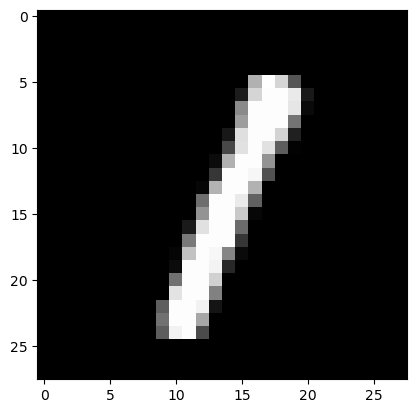

In [37]:
index=10
model.eval()
data=X_test[index]
output=model(data)
_, predicted=torch.max(output.data,0)
print("예측결과:", predicted)
print("정답:", Y_test[10])

X_test_show=(X_test[index].numpy())
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
plt.show()

In [43]:
predicteds=model(X_test)
predicted_list=[]
#print(predicteds)
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    #print(v)
    #print(index)
    predicted_list.append(index.item())
predicted=torch.from_numpy(np.array(predicted_list))
print(predicted)
print(Y_test)

tensor([0, 4, 1,  ..., 1, 3, 0], dtype=torch.int32)
tensor([0, 4, 1,  ..., 1, 3, 0])


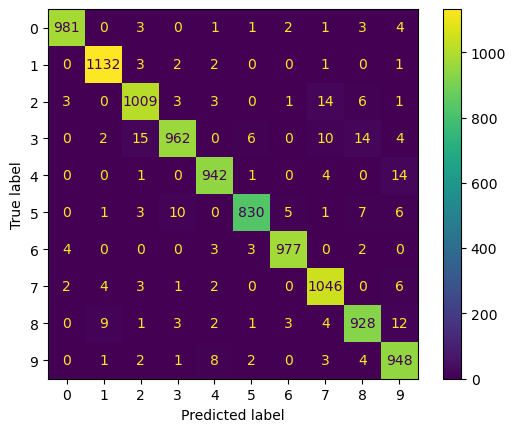

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test, predicted)
ConfusionMatrixDisplay(cm).plot()